In [120]:
import sys,os

import random
import cv2

import colorsys
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from scipy.spatial import Delaunay
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import matplotlib.pyplot as plt

### CW

In [2]:
# Create a black image
img = np.zeros((512, 512, 3), np.uint8)

In [3]:
# Draw a diagonal red line with thickness of 5 px
cv.line(img, (0, 0), (250, 511), (0, 255, 0), 5)
pass

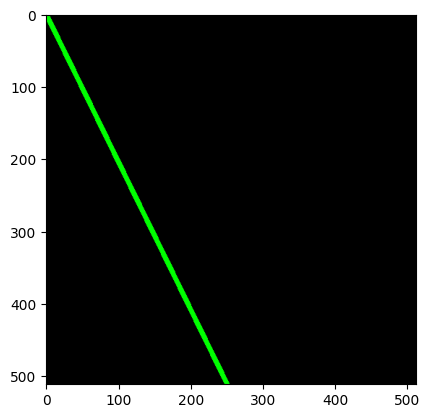

In [4]:
plt.imshow(img)

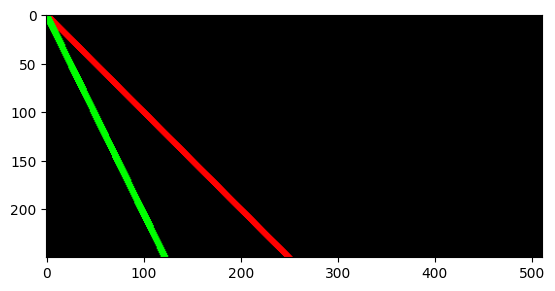

In [ ]:
img_crop = img[:250, :511, :]
plt.imshow(img_crop)

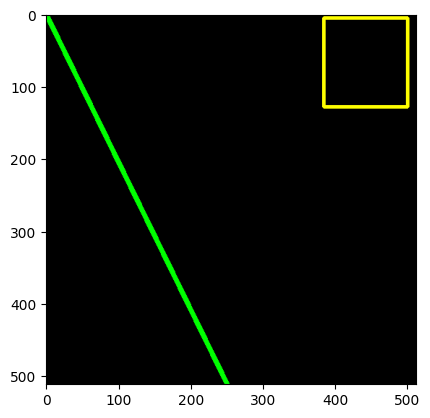

In [ ]:
# To draw a rectangle, you need top-left corner and bottom-right corner of rectangle.
# This time we will draw a green rectangle at the top-right corner of image.
cv.rectangle(img, (384, 5), (500, 128), (255, 255, 0), 3)
plt.imshow(img)

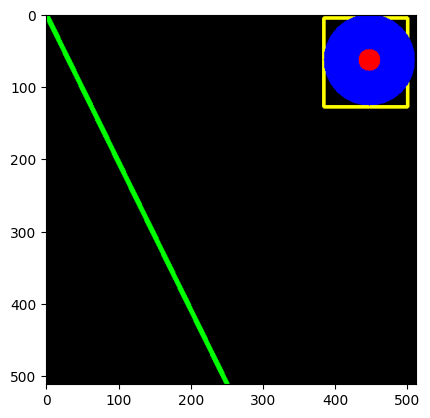

In [ ]:
# To draw a circle, you need its center coordinates and radius.
# We will draw a circle inside the rectangle drawn above.
cv.circle(img, (447, 63), 15, (255, 0, 0), -1)
plt.imshow(img)

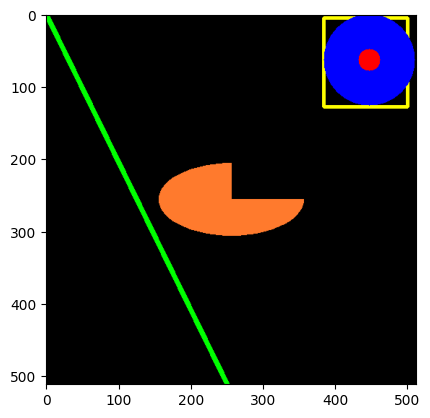

In [ ]:
cv.ellipse(
    img,
    # center
    (256, 256),
    # axes
    (100, 50),
    # angle
    0,
    # startAngle
    0,
    # endAngle
    270,
    # color
    (255, 122, 45),
    # thickness (filled if negative)
    -1)
plt.imshow(img)

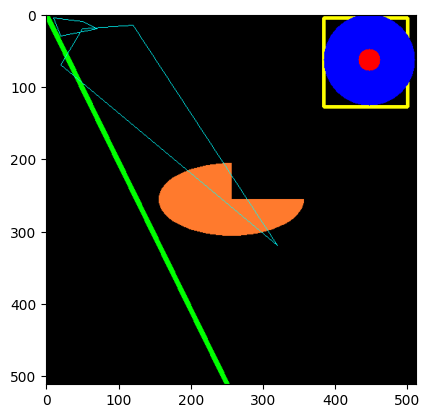

In [ ]:
pts1 = np.array([
    [10, 5], [20, 30], [70, 20], [50, 10]
], np.int32)
pts1 = pts1.reshape((-1, 1, 2))

pts2 = np.array([
    [120, 15], [320, 320], [20, 70], [50, 20]
], np.int32)
pts2 = pts2.reshape((-1, 1, 2))

cv.polylines(img, [pts1, pts2], True, (0, 255, 255))
plt.imshow(img)

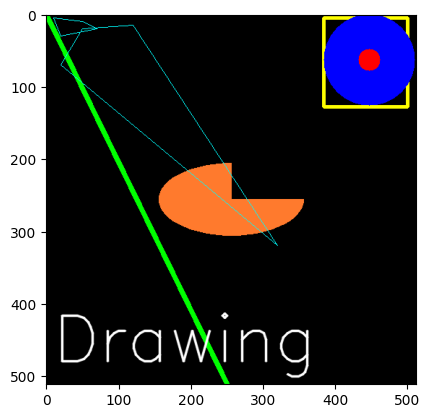

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'Drawing', (10, 480), font, 3, (255, 255, 255), 2, cv.LINE_AA)
plt.imshow(img)

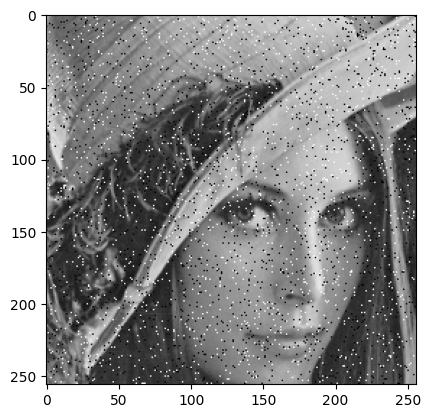

In [ ]:
img = cv.imread("assets/noisy_image.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
kernel = np.ones((20, 20), np.float32) * 1/400
img_res = cv.filter2D(img, -1, kernel)

In [ ]:
img.shape

(1258, 940, 3)

In [ ]:
img_res = cv.blur(img, (5, 5))

In [ ]:
img_res = cv.GaussianBlur(img, (21, 21), 0)

In [ ]:
img_res = cv.bilateralFilter(img, 9, 75, 75)

In [ ]:
img_res = cv.medianBlur(img, 3)

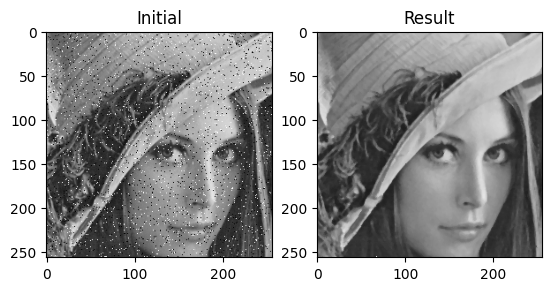

In [ ]:
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Initial')
plt.subplot(122), plt.imshow(img_res, cmap="gray"), plt.title('Result')
plt.show()

###HW

Задания
1. работа с цветовым пространством HSV.
На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость.
Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)
> путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).
2. На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

In [5]:
!wget https://raw.githubusercontent.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/main/Sem3/Lab1/starry_night.jpg

--2023-10-28 14:27:23--  https://raw.githubusercontent.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/main/Sem3/Lab1/starry_night.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 302901 (296K) [image/jpeg]
Saving to: ‘starry_night.jpg’

starry_night.jpg    100%[===================>] 295.80K  --.-KB/s    in 0.04s   

2023-10-28 14:27:23 (6.72 MB/s) - ‘starry_night.jpg’ saved [302901/302901]



#### 1

In [44]:
import math

def rgb_to_hsv(r, g, b):
    r, g, b = float(r) / 255, float(g) / 255, float(b) / 255
    high = max(r, g, b)
    low = min(r, g, b)
    h, s, v = high, high, high

    d = high - low
    s = 0 if high == 0 else d / high

    if high == low:
        h = 0.0
    else:
        if high == r:
            h = (g - b) / d + (6 if g < b else 0)
        elif high == g:
            h = (b - r) / d + 2
        else:
            h = (r - g) / d + 4
        h /= 6

    return h, s, v

def hsv_to_rgb(h, s, v):
    i = math.floor(h*6)
    f = h*6 - i
    p = v * (1-s)
    q = v * (1-f*s)
    t = v * (1-(1-f)*s)

    r, g, b = [
        (v, t, p),
        (q, v, p),
        (p, v, t),
        (p, q, v),
        (t, p, v),
        (v, p, q),
    ][int(i%6)]

    return r, g, b

def rgb_to_hsl(r, g, b):
    r = float(r)
    g = float(g)
    b = float(b)
    high = max(r, g, b)
    low = min(r, g, b)
    h, s, v = ((high + low) / 2,)*3

    if high == low:
        h = 0.0
        s = 0.0
    else:
        d = high - low
        s = d / (2 - high - low) if l > 0.5 else d / (high + low)
        h = {
            r: (g - b) / d + (6 if g < b else 0),
            g: (b - r) / d + 2,
            b: (r - g) / d + 4,
        }[high]
        h /= 6

    return h, s, v

def hsl_to_rgb(h, s, l):
    def hue_to_rgb(p, q, t):
        t += 1 if t < 0 else 0
        t -= 1 if t > 1 else 0
        if t < 1/6: return p + (q - p) * 6 * t
        if t < 1/2: return q
        if t < 2/3: p + (q - p) * (2/3 - t) * 6
        return p

    if s == 0:
        r, g, b = l, l, l
    else:
        q = l * (1 + s) if l < 0.5 else l + s - l * s
        p = 2 * l - q
        r = hue_to_rgb(p, q, h + 1/3)
        g = hue_to_rgb(p, q, h)
        b = hue_to_rgb(p, q, h - 1/3)

    return r, g, b

def hsv_to_hsl(h, s, v):
    l = 0.5 * v  * (2 - s)
    s = v * s / (1 - math.fabs(2*l-1))
    return h, s, l

def hsl_to_hsv(h, s, l):
    v = (2*l + s*(1-math.fabs(2*l-1)))/2
    s = 2*(v-l)/v
    return h, s, v

In [88]:
starry_night_path = os.path.join(
    os.getcwd(),
    'starry_night.jpg'
)
starry_day_path = os.path.join(
    os.getcwd(),
    'starry_day.jpg'
)

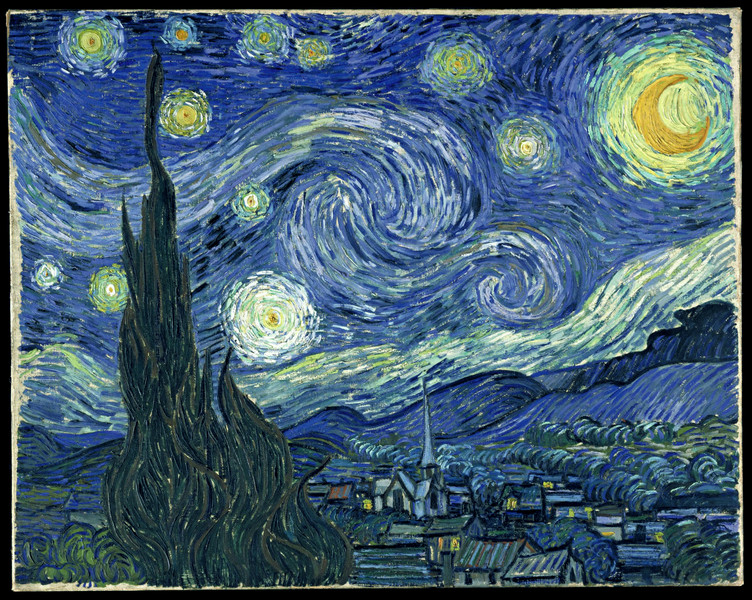

In [94]:
st_night_im = Image.open(starry_night_path)
st_night_im

In [90]:
st_night_im_arr = np.array(st_night_im)
st_night_im_arr.shape

(600, 752, 3)

In [91]:
st_night_im_arr_hsv = np.array(
    [
        [
            np.vectorize(rgb_to_hsv)(*st_night_im_arr[i,j,:]) for j in range(st_night_im_arr.shape[1])
        ] for i in range(st_night_im_arr.shape[0])
    ]
)

* Увеличение яркости:

> Увеличьте значение компоненты "Value" (V) в цветовом пространстве HSV для каждого пикселя изображения.
Вы можете умножить значение V на масштабирующий коэффициент, чтобы увеличить яркость. Например, V_new = V_old * scaling_factor.

* Смена темно-синих тонов на светло-желтые:

> Определите диапазон значений оттенка (H) и насыщенности (S), который соответствует темно-синим тонам на вашем изображении. Это может быть какой-то диапазон оттенков с низкой насыщенностью.
Замените значения H и S в этом диапазоне на значения, соответствующие светло-желтым тонам. Например, вы можете установить H и S на определенные значения, которые соответствуют светло-желтому цвету в цветовом пространстве HSV.


Обратите внимание, что конкретные значения коэффициентов и диапазонов оттенков и насыщенности могут варьироваться в зависимости от ваших предпочтений и характеристик изображения. Вы можете экспериментировать с этими параметрами, чтобы достичь желаемых результатов.

In [92]:
k = 1.2

st_night_im_arr_hsv[:,:,2] = np.clip(st_night_im_arr_hsv[:,:,2]* k,0,1)

In [93]:
dark_blue_vals = {
    'hue':( 0.6 , 0.75),
    'sat':(0.2 , 1.0)
}
white_yellow_vals = {
    'hue':(0.1, 0.25),
    'sat' : (0.2, 1.0)
}

is_dark_blue = np.logical_and(
    np.logical_and(dark_blue_vals['hue'][0] <= st_night_im_arr_hsv[:, :, 0], st_night_im_arr_hsv[:, :, 0] <= dark_blue_vals['hue'][1]),
    np.logical_and(dark_blue_vals['sat'][0] <= st_night_im_arr_hsv[:, :, 1], st_night_im_arr_hsv[:, :, 1] <= dark_blue_vals['sat'][1])
)



# Функция для применения к каждому элементу вектора
def custom_operation(index,value, is_true):
    if is_true:
      match  index:
        case 0: # h
          return (value - min(dark_blue_vals['hue']))/(max(dark_blue_vals['hue']) - min(dark_blue_vals['hue'])) * \
           (max(white_yellow_vals['hue']) -  min(white_yellow_vals['hue']))  \
            +  min(white_yellow_vals['hue'])
        case 1: # s
          return (value - min(dark_blue_vals['sat']))/(max(dark_blue_vals['sat']) - min(dark_blue_vals['sat'])) * \
           (max(white_yellow_vals['sat']) -  min(white_yellow_vals['sat']))  \
            +  min(white_yellow_vals['sat'])
        case 2: # v
          return value
    return value
# # Примените функцию к каждому элементу трехмерного массива
result_array = np.empty_like(st_night_im_arr_hsv)

for i in range(3):
    result_array[:, :, i] = np.vectorize(custom_operation)(index=i,value=st_night_im_arr_hsv[:, :, i], is_true=is_dark_blue)


In [95]:
st_day_im_arr_rgb = np.array(
    [
        [
            np.vectorize(hsv_to_rgb)(*result_array[i,j,:]) for j in range(result_array.shape[1])
        ] for i in range(result_array.shape[0])
    ]
)

In [97]:
st_day_im_arr_rgb_scaled = (st_day_im_arr_rgb * 255).astype(np.uint8)
Image.fromarray(st_day_im_arr_rgb_scaled).save(starry_day_path)

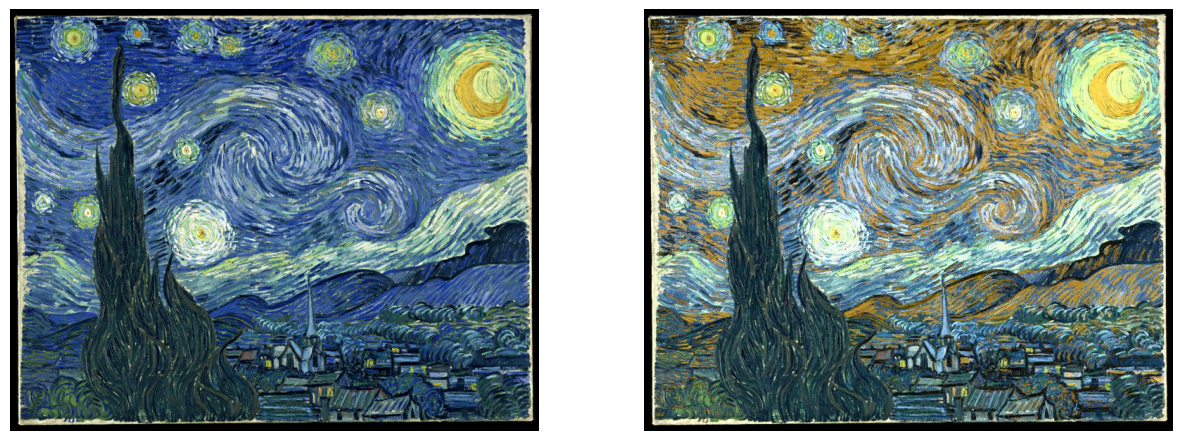

In [98]:
# Загрузка картинок
image1 = Image.open(starry_night_path)
image2 = Image.open(starry_day_path)

# Создание объекта Figure и Axes с использованием subplot
fig, axes = plt.subplots(1, 2,figsize=(15, 15))

# Отображение каждой картинки на своем Axes
axes[0].imshow(image1)
axes[0].axis('off')  # Отключение осей для первой картинки
axes[1].imshow(image2)
axes[1].axis('off')  # Отключение осей для второй картинки

# Отображение их всех вместе
plt.show()

#### 2

In [123]:
starry_night_path = os.path.join(
    os.getcwd(),
    'starry_night.jpg'
)
starry_night_gray_path = os.path.join(
    os.getcwd(),
    'starry_night_gray.jpg'
)
starry_night_gauss_path = os.path.join(
    os.getcwd(),
    'starry_night_gauss.jpg'
)
starry_night_SaP_path = os.path.join(
    os.getcwd(),
    'starry_night_SaP.jpg'
)
starry_night_uniform_path = os.path.join(
    os.getcwd(),
    'starry_night_uniform.jpg'
)
starry_night_im = Image.open(starry_night_path)

In [112]:
img = Image.open(starry_night_path).convert('L')
img.save(starry_night_gray_path)

In [118]:
starry_night_gray_im = Image.open(starry_night_gray_path)
np.array(starry_night_gray_im).shape

(600, 752)

In [122]:
mu,sigma = int(128),20
noise_gauss = np.random.normal(mu,sigma,size=np.array(starry_night_gray_im).shape) #  μ = 0, σ = 2, size = length of x or y.
noisy_gauss_image = Image.fromarray((np.array(starry_night_gray_im) + noise_gauss).astype(np.uint8))
noisy_gauss_image.save(starry_night_gauss_path)

In [119]:
def add_noise(img):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread(starry_night_gray_path,
                 cv2.IMREAD_GRAYSCALE)

#Storing the image
cv2.imwrite(starry_night_SaP_path,
            add_noise(img))

True

In [125]:
noise_uniform = np.random.uniform(0,255,size=np.array(starry_night_gray_im).shape)*0.5 #  μ = 0, σ = 2, size = length of x or y.
noise_uniform_image = Image.fromarray((np.array(starry_night_gray_im) + noise_uniform).astype(np.uint8))
noise_uniform_image.save(starry_night_uniform_path)

In [162]:
from PIL import Image, ImageFilter
import os

medianFilter_sizes = [3,9]#np.linspace(2.9,3.2,6).tolist()
gaussianBlur_radiuses = list(range(2, 5, 1))

list_of_noised_images = [
    starry_night_gauss_path, starry_night_SaP_path, starry_night_uniform_path
]

lists_for_show = []

for _, path in enumerate(list_of_noised_images):
    list_for_show = {}
    im_noised = Image.open(path)
    list_for_show['noised'] = im_noised

    for size in medianFilter_sizes:
        median_filtered_image_path = os.path.join(
            os.getcwd(),
            f'MedianFilter_size_{size}_{os.path.basename(path)}'
        )
        im_noised_median_filtered = im_noised.filter(ImageFilter.MedianFilter(size=size))
        im_noised_median_filtered.save(median_filtered_image_path)
        list_for_show[f'MedianFilter_size_{size}'] = im_noised_median_filtered

    for radius in gaussianBlur_radiuses:
        gaussianBlur_image_path = os.path.join(
            os.getcwd(),
            f'GaussianBlur_radius_{radius}_{os.path.basename(path)}'
        )
        im_noised_gaussian_blurred = im_noised.filter(ImageFilter.GaussianBlur(radius=radius))
        im_noised_gaussian_blurred.save(gaussianBlur_image_path)
        list_for_show[f'GaussianBlur_radius_{radius}'] = im_noised_gaussian_blurred

    lists_for_show.append(list_for_show)

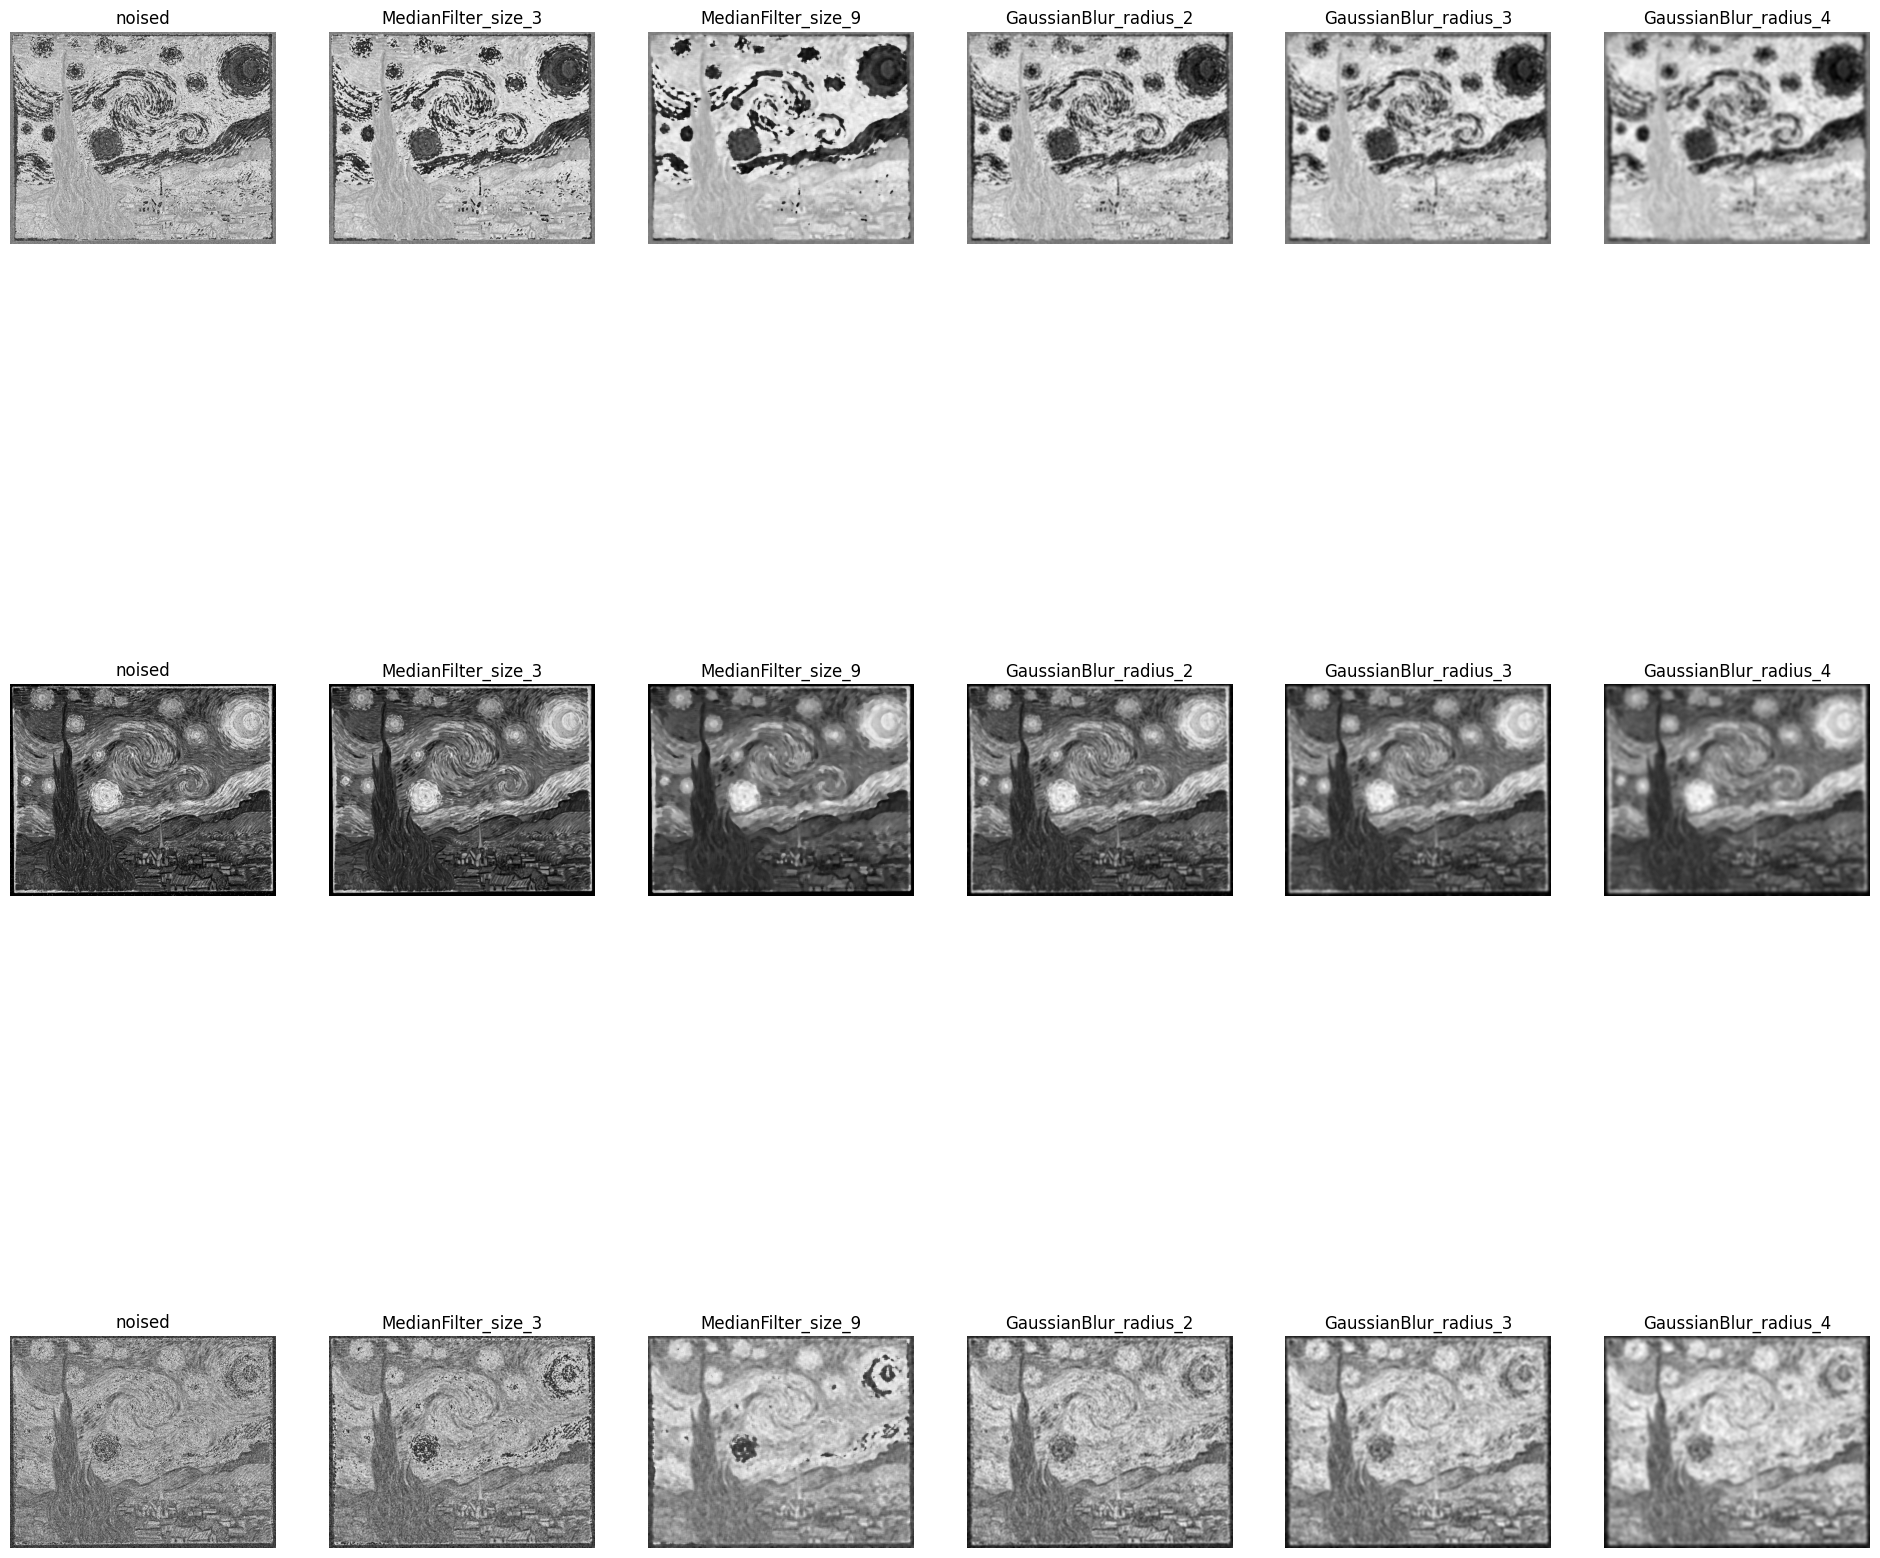

In [163]:
keys = list(lists_for_show[0].keys())

# Create a subplot with the desired number of rows and columns
fig, axes = plt.subplots(len(lists_for_show), len(keys), figsize=(24, 24))

for i in range(len(lists_for_show)):
    for j in range(len(keys)):
        image = lists_for_show[i][keys[j]]
        axes[i, j].imshow(image, cmap='gray')  # Use the 'gray' colormap for grayscale images
        axes[i, j].set_title(keys[j])  # Set the title for the subplots
        axes[i, j].axis('off')

plt.show()